In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    confusion_matrix, classification_report, roc_curve, auc, 
    precision_recall_curve, average_precision_score,
    mean_squared_error, mean_absolute_error, r2_score,
    log_loss, cohen_kappa_score, matthews_corrcoef
)
from sklearn.preprocessing import label_binarize
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)


# Table of Contents

# 1. **Binary Classification Metrics**
- Confusion Matrix
- Accuracy, Precision, Recall, F1-Score
- ROC Curve and AUC
- Precision-Recall Curve
- Log Loss
- Matthews Correlation Coefficient
 
# 2. **Multi-class Classification Metrics**
- Multi-class Confusion Matrix
- Macro vs Micro Averaging
- Cohen's Kappa
 
# 3. **Regression Metrics**
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- Mean Absolute Error (MAE)
- R-squared (R²)
- Mean Absolute Percentage Error (MAPE)
 
# 4. **Additional  Topics**
- Class Imbalance Considerations
- Metric Selection Guidelines

# =============================================================================
# 1. BINARY CLASSIFICATION METRICS
# =============================================================================

In [7]:
print("\n BINARY CLASSIFICATION METRICS")
print("=" * 40)

# Generate fake binary classification data
n_samples = 1000

# True labels (0 or 1)
y_true_binary = np.random.binomial(1, 0.3, n_samples)  # 30% positive class

# Predicted probabilities (simulating a decent model)
y_prob_binary = np.random.beta(2, 5, n_samples)  # Base probabilities
y_prob_binary[y_true_binary == 1] += np.random.normal(0.4, 0.1, sum(y_true_binary))  # Boost positive class probs
y_prob_binary = np.clip(y_prob_binary, 0, 1)  # Ensure [0,1] range

# Predicted labels (using 0.5 threshold)
y_pred_binary = (y_prob_binary >= 0.5).astype(int)

print(f"Dataset: {n_samples} samples")
print(f"True positive class ratio: {y_true_binary.mean():.3f}")
print(f"Predicted positive class ratio: {y_pred_binary.mean():.3f}")


📊 BINARY CLASSIFICATION METRICS
Dataset: 1000 samples
True positive class ratio: 0.288
Predicted positive class ratio: 0.321



🔍 Confusion Matrix
--------------------
Confusion Matrix:
                 Predicted
                 0    1
Actual    0    626   86
          1     53  235

True Negatives (TN):  626
False Positives (FP): 86
False Negatives (FN): 53
True Positives (TP):  235

📈 Basic Classification Metrics
------------------------------
Accuracy:  0.8610 = (TP + TN) / (TP + TN + FP + FN)
           0.8610 = (235 + 626) / (235 + 626 + 86 + 53)

Precision: 0.7321 = TP / (TP + FP)
           0.7321 = 235 / (235 + 86)
           → Of all positive predictions, how many were correct?

Recall:    0.8160 = TP / (TP + FN)
           0.8160 = 235 / (235 + 53)
           → Of all actual positives, how many were found?

F1-Score:  0.7718 = 2 × (Precision × Recall) / (Precision + Recall)
           0.7718 = 2 × (0.7321 × 0.8160) / (0.7321 + 0.8160)
           → Harmonic mean of precision and recall

🎯 ROC Curve and AUC
--------------------
AUC-ROC: 0.9433
AUC-ROC measures the area under the ROC curve
Perfect clas

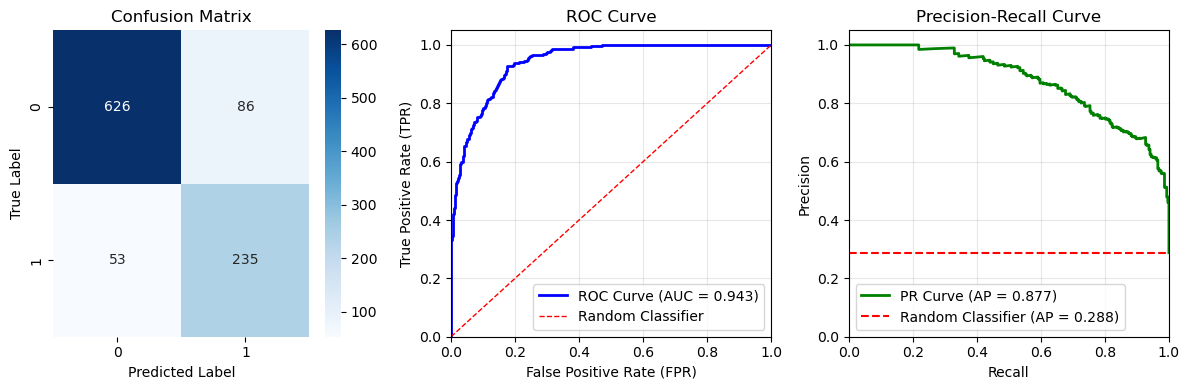


📉 Log Loss (Cross-Entropy)
-------------------------
Log Loss: 0.3953
Log Loss penalizes confident wrong predictions heavily
Lower is better (perfect = 0)
Formula: -[y*log(p) + (1-y)*log(1-p)]

🔗 Matthews Correlation Coefficient (MCC)
----------------------------------------
MCC: 0.6743
MCC ranges from -1 to +1
+1: Perfect prediction
 0: Random prediction
-1: Perfect inverse prediction
Especially useful for imbalanced datasets


In [ ]:
# 1.1 Confusion Matrix
print("\n Confusion Matrix")
print("-" * 20)

cm = confusion_matrix(y_true_binary, y_pred_binary)
print("Confusion Matrix:")
print(f"                 Predicted")
print(f"                 0    1")
print(f"Actual    0   {cm[0,0]:4d} {cm[0,1]:4d}")
print(f"          1   {cm[1,0]:4d} {cm[1,1]:4d}")

# Extract values for clarity
tn, fp, fn, tp = cm.ravel()
print(f"\nTrue Negatives (TN):  {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP):  {tp}")

# Visualize confusion matrix
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# %%
# 1.2 Basic Classification Metrics
print("\n Basic Classification Metrics")
print("-" * 30)

accuracy = accuracy_score(y_true_binary, y_pred_binary)
precision = precision_score(y_true_binary, y_pred_binary)
recall = recall_score(y_true_binary, y_pred_binary)
f1 = f1_score(y_true_binary, y_pred_binary)

print(f"Accuracy:  {accuracy:.4f} = (TP + TN) / (TP + TN + FP + FN)")
print(f"           {accuracy:.4f} = ({tp} + {tn}) / ({tp} + {tn} + {fp} + {fn})")

print(f"\nPrecision: {precision:.4f} = TP / (TP + FP)")
print(f"           {precision:.4f} = {tp} / ({tp} + {fp})")
print("           → Of all positive predictions, how many were correct?")

print(f"\nRecall:    {recall:.4f} = TP / (TP + FN)")
print(f"           {recall:.4f} = {tp} / ({tp} + {fn})")
print("           → Of all actual positives, how many were found?")

print(f"\nF1-Score:  {f1:.4f} = 2 × (Precision × Recall) / (Precision + Recall)")
print(f"           {f1:.4f} = 2 × ({precision:.4f} × {recall:.4f}) / ({precision:.4f} + {recall:.4f})")
print("           → Harmonic mean of precision and recall")

# %%
# 1.3 ROC Curve and AUC
print("\n ROC Curve and AUC")
print("-" * 20)

fpr, tpr, thresholds = roc_curve(y_true_binary, y_prob_binary)
roc_auc = auc(fpr, tpr)

print(f"AUC-ROC: {roc_auc:.4f}")
print("AUC-ROC measures the area under the ROC curve")
print("Perfect classifier: AUC = 1.0")
print("Random classifier: AUC = 0.5")

plt.subplot(1, 3, 2)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

# %%
# 1.4 Precision-Recall Curve
print("\n Precision-Recall Curve")
print("-" * 25)

precision_vals, recall_vals, pr_thresholds = precision_recall_curve(y_true_binary, y_prob_binary)
avg_precision = average_precision_score(y_true_binary, y_prob_binary)

print(f"Average Precision (AP): {avg_precision:.4f}")
print("AP summarizes the precision-recall curve")
print("Especially useful for imbalanced datasets")

plt.subplot(1, 3, 3)
plt.plot(recall_vals, precision_vals, color='green', lw=2, label=f'PR Curve (AP = {avg_precision:.3f})')
plt.axhline(y=y_true_binary.mean(), color='red', linestyle='--', 
           label=f'Random Classifier (AP = {y_true_binary.mean():.3f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# %%
# 1.5 Log Loss (Cross-Entropy Loss)
print("\n Log Loss (Cross-Entropy)")
print("-" * 25)

logloss = log_loss(y_true_binary, y_prob_binary)
print(f"Log Loss: {logloss:.4f}")
print("Log Loss penalizes confident wrong predictions heavily")
print("Lower is better (perfect = 0)")
print("Formula: -[y*log(p) + (1-y)*log(1-p)]")

# %%
# 1.6 Matthews Correlation Coefficient
print("\n Matthews Correlation Coefficient (MCC)")
print("-" * 40)

mcc = matthews_corrcoef(y_true_binary, y_pred_binary)
print(f"MCC: {mcc:.4f}")
print("MCC ranges from -1 to +1")
print("+1: Perfect prediction")
print(" 0: Random prediction")
print("-1: Perfect inverse prediction")
print("Especially useful for imbalanced datasets")

In [11]:
# =============================================================================
# 2. MULTI-CLASS CLASSIFICATION METRICS
# =============================================================================



🎭 MULTI-CLASS CLASSIFICATION METRICS
Dataset: 1000 samples, 4 classes
Class distribution:
  Class A: True=354 (35.4%), Pred=510 (51.0%)
  Class B: True=309 (30.9%), Pred=304 (30.4%)
  Class C: True=215 (21.5%), Pred=142 (14.2%)
  Class D: True=122 (12.2%), Pred= 44 (4.4%)

🎯 Multi-class Confusion Matrix
------------------------------
Confusion Matrix:
Rows = True labels, Columns = Predicted labels
         Class A  Class B  Class C  Class D
Class A      289       41       17        7
Class B       89      173       33       14
Class C       89       44       77        5
Class D       43       46       15       18

⚖️ Macro vs Micro Averaging
----------------------------
Overall Accuracy: 0.5570

Precision:
  Macro:    0.5218 (unweighted mean)
  Micro:    0.5570 (global average)
  Weighted: 0.5429 (weighted by support)

Recall:
  Macro:    0.4705
  Micro:    0.5570
  Weighted: 0.5570

F1-Score:
  Macro:    0.4704
  Micro:    0.5570
  Weighted: 0.5304

Per-class Metrics:
  Class A: Pre

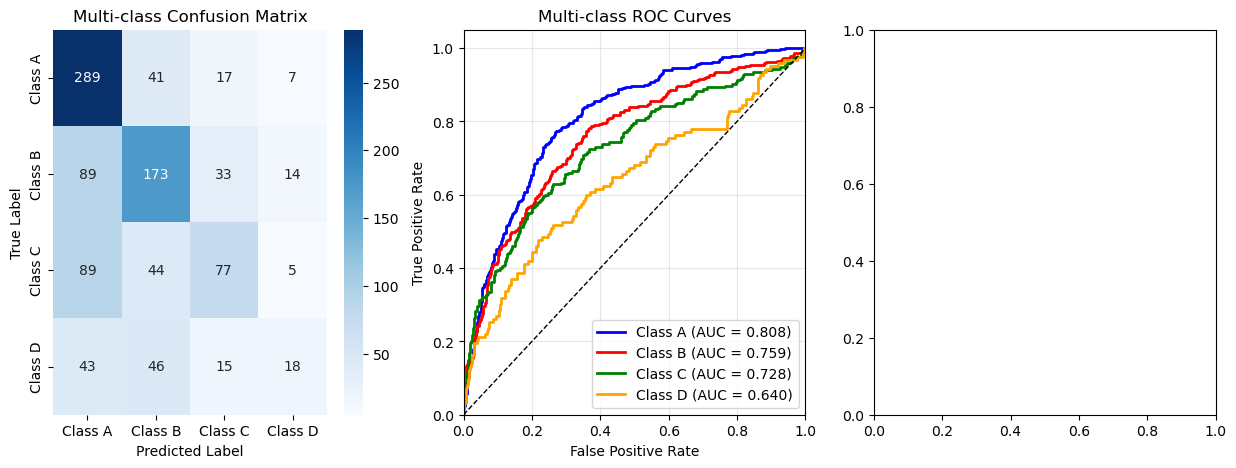

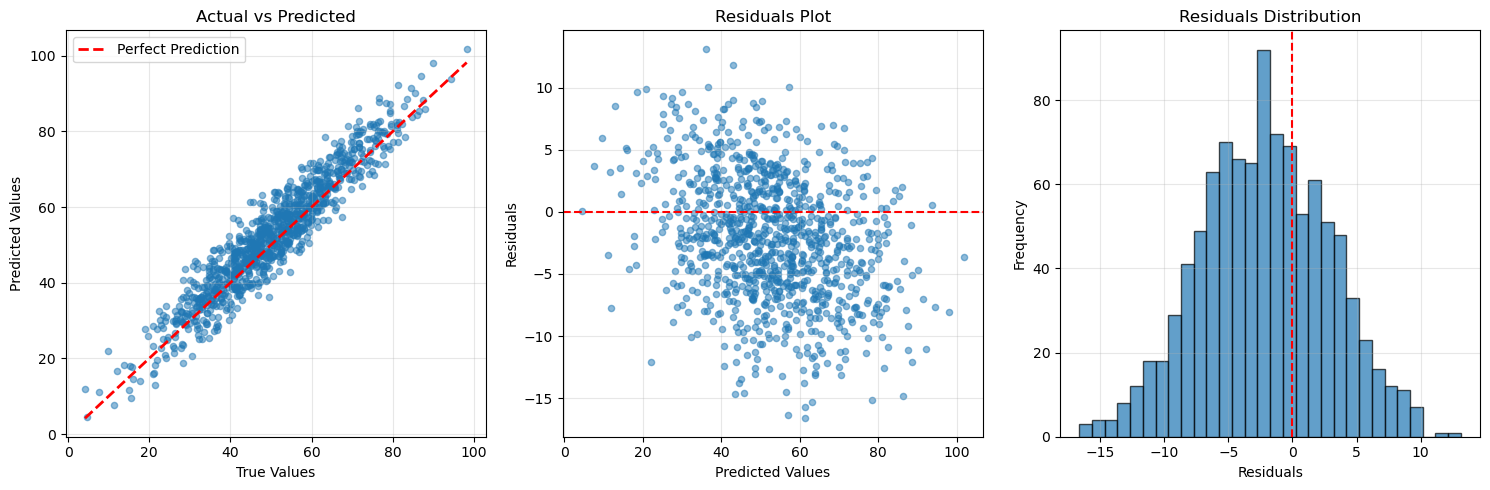


📋 Regression Metrics Summary:
MSE:  30.1562
RMSE: 5.4915
MAE:  4.4504
R²:   0.8598
MAPE: 10.14%


🚀 ADVANCED TOPICS

⚖️ Class Imbalance Considerations
------------------------------
Imbalanced dataset: 5.0% positive class
Accuracy:  0.8970 (Can be misleading!)
Precision: 0.0182
Recall:    0.0200
F1-Score:  0.0190

💡 For imbalanced data, focus on:
   - Precision, Recall, F1-Score
   - AUC-ROC and AUC-PR
   - Matthews Correlation Coefficient

🎯 Metric Selection Guidelines
----------------------------

Binary Classification:
  Balanced classes: Accuracy, F1-Score, AUC-ROC
  Imbalanced classes: Precision, Recall, F1-Score, AUC-PR, MCC
  Cost-sensitive: Precision (minimize FP), Recall (minimize FN)
  Probability calibration: Log Loss, Brier Score

Multi-class Classification:
  Balanced classes: Accuracy, Macro F1, Cohen's Kappa
  Imbalanced classes: Weighted F1, Cohen's Kappa, Per-class metrics
  Many classes: Top-k Accuracy, Mean Reciprocal Rank

Regression:
  General purpose: RMSE, MAE, 

In [12]:

print("\n\n MULTI-CLASS CLASSIFICATION METRICS")
print("=" * 45)

# Generate fake multi-class classification data
n_classes = 4
class_names = ['Class A', 'Class B', 'Class C', 'Class D']

# True labels
y_true_multi = np.random.choice(n_classes, n_samples, p=[0.4, 0.3, 0.2, 0.1])

# Predicted probabilities (simulating a decent model)
y_prob_multi = np.random.dirichlet([2, 1.5, 1, 0.5], n_samples)
# Add some bias towards correct predictions
for i in range(n_samples):
    y_prob_multi[i, y_true_multi[i]] *= np.random.uniform(1.5, 3.0)
    y_prob_multi[i] /= y_prob_multi[i].sum()  # Normalize

# Predicted labels
y_pred_multi = np.argmax(y_prob_multi, axis=1)

print(f"Dataset: {n_samples} samples, {n_classes} classes")
print("Class distribution:")
for i, name in enumerate(class_names):
    true_count = sum(y_true_multi == i)
    pred_count = sum(y_pred_multi == i)
    print(f"  {name}: True={true_count:3d} ({true_count/n_samples:.1%}), "
          f"Pred={pred_count:3d} ({pred_count/n_samples:.1%})")

# %%
# 2.1 Multi-class Confusion Matrix
print("\n Multi-class Confusion Matrix")
print("-" * 30)

cm_multi = confusion_matrix(y_true_multi, y_pred_multi)
print("Confusion Matrix:")
print("Rows = True labels, Columns = Predicted labels")

# Create a DataFrame for better visualization
cm_df = pd.DataFrame(cm_multi, index=class_names, columns=class_names)
print(cm_df)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(cm_multi, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.title('Multi-class Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# %%
# 2.2 Macro vs Micro Averaging
print("\n⚖️ Macro vs Micro Averaging")
print("-" * 28)

# Calculate metrics with different averaging strategies
accuracy_multi = accuracy_score(y_true_multi, y_pred_multi)
precision_macro = precision_score(y_true_multi, y_pred_multi, average='macro')
precision_micro = precision_score(y_true_multi, y_pred_multi, average='micro')
precision_weighted = precision_score(y_true_multi, y_pred_multi, average='weighted')

recall_macro = recall_score(y_true_multi, y_pred_multi, average='macro')
recall_micro = recall_score(y_true_multi, y_pred_multi, average='micro')
recall_weighted = recall_score(y_true_multi, y_pred_multi, average='weighted')

f1_macro = f1_score(y_true_multi, y_pred_multi, average='macro')
f1_micro = f1_score(y_true_multi, y_pred_multi, average='micro')
f1_weighted = f1_score(y_true_multi, y_pred_multi, average='weighted')

print(f"Overall Accuracy: {accuracy_multi:.4f}")
print("\nPrecision:")
print(f"  Macro:    {precision_macro:.4f} (unweighted mean)")
print(f"  Micro:    {precision_micro:.4f} (global average)")
print(f"  Weighted: {precision_weighted:.4f} (weighted by support)")

print("\nRecall:")
print(f"  Macro:    {recall_macro:.4f}")
print(f"  Micro:    {recall_micro:.4f}")
print(f"  Weighted: {recall_weighted:.4f}")

print("\nF1-Score:")
print(f"  Macro:    {f1_macro:.4f}")
print(f"  Micro:    {f1_micro:.4f}")
print(f"  Weighted: {f1_weighted:.4f}")

# Per-class metrics
print("\nPer-class Metrics:")
precision_per_class = precision_score(y_true_multi, y_pred_multi, average=None)
recall_per_class = recall_score(y_true_multi, y_pred_multi, average=None)
f1_per_class = f1_score(y_true_multi, y_pred_multi, average=None)

for i, name in enumerate(class_names):
    print(f"  {name}: Precision={precision_per_class[i]:.3f}, "
          f"Recall={recall_per_class[i]:.3f}, F1={f1_per_class[i]:.3f}")

# %%
# 2.3 Cohen's Kappa
print("\n Cohen's Kappa")
print("-" * 15)

kappa = cohen_kappa_score(y_true_multi, y_pred_multi)
print(f"Cohen's Kappa: {kappa:.4f}")
print("Kappa measures inter-rater agreement")
print("Accounts for agreement by chance")
print("Interpretation:")
print("  < 0.00: Poor agreement")
print("  0.00-0.20: Slight agreement")
print("  0.21-0.40: Fair agreement") 
print("  0.41-0.60: Moderate agreement")
print("  0.61-0.80: Substantial agreement")
print("  0.81-1.00: Almost perfect agreement")

# %%
# 2.4 Multi-class ROC Curves
print("\n Multi-class ROC Analysis")
print("-" * 25)

# Binarize the labels for ROC calculation
y_true_binarized = label_binarize(y_true_multi, classes=range(n_classes))

# Calculate ROC curve and AUC for each class
fpr_multi = {}
tpr_multi = {}
roc_auc_multi = {}

plt.subplot(1, 3, 2)
colors = ['blue', 'red', 'green', 'orange']

for i in range(n_classes):
    fpr_multi[i], tpr_multi[i], _ = roc_curve(y_true_binarized[:, i], y_prob_multi[:, i])
    roc_auc_multi[i] = auc(fpr_multi[i], tpr_multi[i])
    plt.plot(fpr_multi[i], tpr_multi[i], color=colors[i], lw=2,
             label=f'{class_names[i]} (AUC = {roc_auc_multi[i]:.3f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curves')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

print("Per-class AUC-ROC scores:")
for i, name in enumerate(class_names):
    print(f"  {name}: {roc_auc_multi[i]:.4f}")

# %%
# Classification Report
print("\n Detailed Classification Report")
print("-" * 32)
print(classification_report(y_true_multi, y_pred_multi, target_names=class_names))



# =============================================================================
# 3. REGRESSION METRICS
# =============================================================================



📏 REGRESSION METRICS
Dataset: 1000 samples
True values range: [-2.99, 92.77]
Predicted values range: [8.01, 96.52]

🎯 Mean Squared Error (MSE) and RMSE
-----------------------------------
MSE:  31.1833
RMSE: 5.5842
MSE penalizes large errors more heavily
RMSE is in the same units as the target variable

📐 Mean Absolute Error (MAE)
-------------------------
MAE: 4.4060
MAE is less sensitive to outliers than MSE/RMSE
Represents average absolute difference

📊 R-squared (R²)
---------------
R²: 0.8624
R² represents proportion of variance explained
R² = 1: Perfect predictions
R² = 0: As good as predicting the mean
R² < 0: Worse than predicting the mean
R² = 1 - (SS_res / SS_tot) = 1 - (31183.32 / 226652.19) = 0.8624

📊 Mean Absolute Percentage Error (MAPE)
----------------------------------------
MAPE: 10.99%
MAPE gives percentage error relative to true values
Useful for understanding relative prediction accuracy

📈 Regression Analysis Visualization
---------------------------------


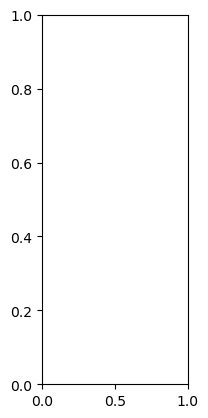

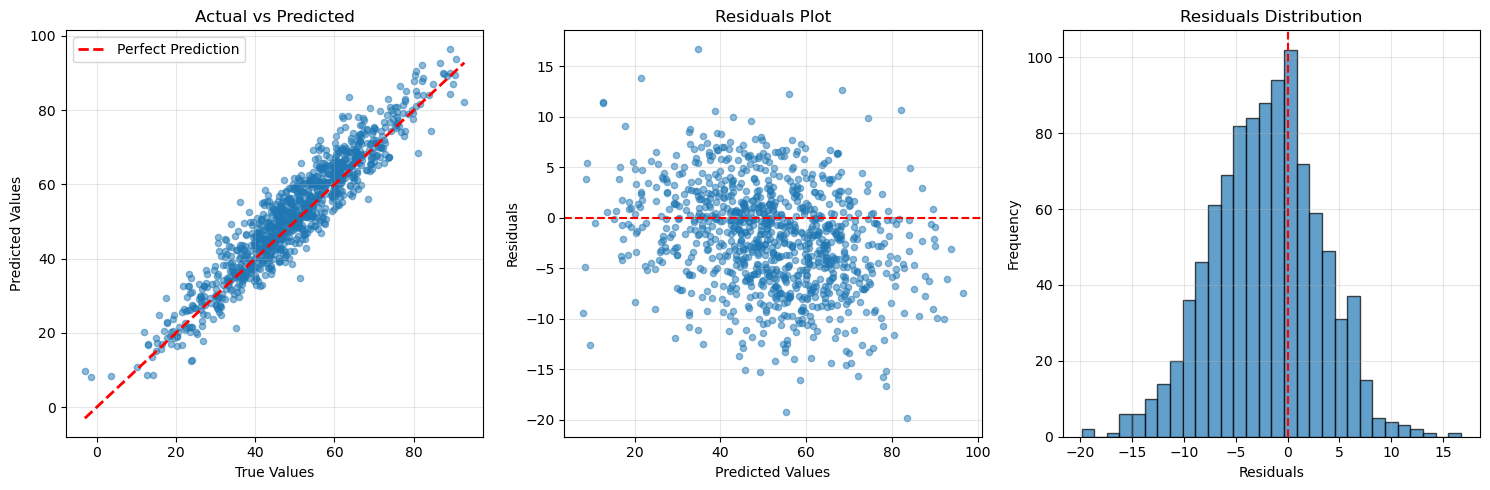


📋 Regression Metrics Summary:
MSE:  31.1833
RMSE: 5.5842
MAE:  4.4060
R²:   0.8624
MAPE: 10.99%


🚀 ADVANCED TOPICS

⚖️ Class Imbalance Considerations
------------------------------
Imbalanced dataset: 4.5% positive class
Accuracy:  0.9070 (Can be misleading!)
Precision: 0.0385
Recall:    0.0444
F1-Score:  0.0412

💡 For imbalanced data, focus on:
   - Precision, Recall, F1-Score
   - AUC-ROC and AUC-PR
   - Matthews Correlation Coefficient

🎯 Metric Selection Guidelines
----------------------------

Binary Classification:
  Balanced classes: Accuracy, F1-Score, AUC-ROC
  Imbalanced classes: Precision, Recall, F1-Score, AUC-PR, MCC
  Cost-sensitive: Precision (minimize FP), Recall (minimize FN)
  Probability calibration: Log Loss, Brier Score

Multi-class Classification:
  Balanced classes: Accuracy, Macro F1, Cohen's Kappa
  Imbalanced classes: Weighted F1, Cohen's Kappa, Per-class metrics
  Many classes: Top-k Accuracy, Mean Reciprocal Rank

Regression:
  General purpose: RMSE, MAE, 

In [13]:
print("\n\n REGRESSION METRICS")
print("=" * 25)

# Generate fake regression data
y_true_reg = np.random.normal(50, 15, n_samples)  # True values
noise = np.random.normal(0, 5, n_samples)  # Prediction noise
y_pred_reg = y_true_reg + noise + np.random.normal(2, 1, n_samples)  # Slight bias

print(f"Dataset: {n_samples} samples")
print(f"True values range: [{y_true_reg.min():.2f}, {y_true_reg.max():.2f}]")
print(f"Predicted values range: [{y_pred_reg.min():.2f}, {y_pred_reg.max():.2f}]")

# %%
# 3.1 Mean Squared Error and RMSE
print("\nMean Squared Error (MSE) and RMSE")
print("-" * 35)

mse = mean_squared_error(y_true_reg, y_pred_reg)
rmse = np.sqrt(mse)

print(f"MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print("MSE penalizes large errors more heavily")
print("RMSE is in the same units as the target variable")

# %%
# 3.2 Mean Absolute Error
print("\nMean Absolute Error (MAE)")
print("-" * 25)

mae = mean_absolute_error(y_true_reg, y_pred_reg)
print(f"MAE: {mae:.4f}")
print("MAE is less sensitive to outliers than MSE/RMSE")
print("Represents average absolute difference")

# %%
# 3.3 R-squared (Coefficient of Determination)
print("\n📊 R-squared (R²)")
print("-" * 15)

r2 = r2_score(y_true_reg, y_pred_reg)
print(f"R²: {r2:.4f}")
print("R² represents proportion of variance explained")
print("R² = 1: Perfect predictions")
print("R² = 0: As good as predicting the mean")
print("R² < 0: Worse than predicting the mean")

# Calculate components for understanding
ss_res = np.sum((y_true_reg - y_pred_reg) ** 2)  # Residual sum of squares
ss_tot = np.sum((y_true_reg - np.mean(y_true_reg)) ** 2)  # Total sum of squares
r2_manual = 1 - (ss_res / ss_tot)
print(f"R² = 1 - (SS_res / SS_tot) = 1 - ({ss_res:.2f} / {ss_tot:.2f}) = {r2_manual:.4f}")

# %%
# 3.4 Mean Absolute Percentage Error
print("\n📊 Mean Absolute Percentage Error (MAPE)")
print("-" * 40)

# Avoid division by zero
y_true_nonzero = y_true_reg[y_true_reg != 0]
y_pred_nonzero = y_pred_reg[y_true_reg != 0]

mape = np.mean(np.abs((y_true_nonzero - y_pred_nonzero) / y_true_nonzero)) * 100
print(f"MAPE: {mape:.2f}%")
print("MAPE gives percentage error relative to true values")
print("Useful for understanding relative prediction accuracy")

# %%
# 3.5 Regression Visualization
print("\n📈 Regression Analysis Visualization")
print("-" * 33)

plt.subplot(1, 3, 3)
plt.figure(figsize=(15, 5))

# Actual vs Predicted scatter plot
plt.subplot(1, 3, 1)
plt.scatter(y_true_reg, y_pred_reg, alpha=0.5, s=20)
plt.plot([y_true_reg.min(), y_true_reg.max()], [y_true_reg.min(), y_true_reg.max()], 
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.legend()
plt.grid(True, alpha=0.3)

# Residuals plot
residuals = y_true_reg - y_pred_reg
plt.subplot(1, 3, 2)
plt.scatter(y_pred_reg, residuals, alpha=0.5, s=20)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True, alpha=0.3)

# Residuals histogram
plt.subplot(1, 3, 3)
plt.hist(residuals, bins=30, alpha=0.7, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.axvline(x=0, color='r', linestyle='--')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary of regression metrics
print(f"\n📋 Regression Metrics Summary:")
print(f"MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")
print(f"R²:   {r2:.4f}")
print(f"MAPE: {mape:.2f}%")

# =============================================================================
# 4. Additional Topics
# =============================================================================

In [15]:
print("\n\nAdditional Topics")
print("=" * 20)

# %%
# 4.1 Class Imbalance Impact
print("\n⚖️ Class Imbalance Considerations")
print("-" * 30)

# Create highly imbalanced dataset
y_imbalanced = np.random.binomial(1, 0.05, n_samples)  # Only 5% positive
y_pred_imbalanced = np.random.binomial(1, 0.05, n_samples)  # Naive predictor

print(f"Imbalanced dataset: {y_imbalanced.mean():.1%} positive class")

acc_imb = accuracy_score(y_imbalanced, y_pred_imbalanced)
prec_imb = precision_score(y_imbalanced, y_pred_imbalanced, zero_division=0)
rec_imb = recall_score(y_imbalanced, y_pred_imbalanced)
f1_imb = f1_score(y_imbalanced, y_pred_imbalanced, zero_division=0)

print(f"Accuracy:  {acc_imb:.4f} (Can be misleading!)")
print(f"Precision: {prec_imb:.4f}")
print(f"Recall:    {rec_imb:.4f}")
print(f"F1-Score:  {f1_imb:.4f}")
print("\n💡 For imbalanced data, focus on:")
print("   - Precision, Recall, F1-Score")
print("   - AUC-ROC and AUC-PR")
print("   - Matthews Correlation Coefficient")

# %%
# 4.2 Metric Selection Guidelines
print("\n🎯 Metric Selection Guidelines")
print("-" * 28)

guidelines = {
    "Binary Classification": {
        "Balanced classes": ["Accuracy", "F1-Score", "AUC-ROC"],
        "Imbalanced classes": ["Precision", "Recall", "F1-Score", "AUC-PR", "MCC"],
        "Cost-sensitive": ["Precision (minimize FP)", "Recall (minimize FN)"],
        "Probability calibration": ["Log Loss", "Brier Score"]
    },
    "Multi-class Classification": {
        "Balanced classes": ["Accuracy", "Macro F1", "Cohen's Kappa"],
        "Imbalanced classes": ["Weighted F1", "Cohen's Kappa", "Per-class metrics"],
        "Many classes": ["Top-k Accuracy", "Mean Reciprocal Rank"]
    },
    "Regression": {
        "General purpose": ["RMSE", "MAE", "R²"],
        "Outlier robust": ["MAE", "Huber Loss"],
        "Relative errors": ["MAPE", "SMAPE"],
        "Distribution shape": ["Quantile Loss"]
    }
}

for task, scenarios in guidelines.items():
    print(f"\n{task}:")
    for scenario, metrics in scenarios.items():
        print(f"  {scenario}: {', '.join(metrics)}")

# %%
# 4.3 Cross-Validation Considerations
print("\n🔄 Cross-Validation and Metric Stability")
print("-" * 38)

# Simulate CV results for different metrics
cv_folds = 5
cv_results = {
    'Accuracy': np.random.normal(0.85, 0.03, cv_folds),
    'F1-Score': np.random.normal(0.82, 0.05, cv_folds),
    'AUC-ROC': np.random.normal(0.91, 0.02, cv_folds),
    'Precision': np.random.normal(0.80, 0.08, cv_folds),
    'Recall': np.random.normal(0.84, 0.06, cv_folds)
}

print("Cross-Validation Results (5-fold):")
print("Metric      Mean    Std     Min     Max")
print("-" * 40)
for metric, scores in cv_results.items():
    print(f"{metric:10} {scores.mean():.3f}  {scores.std():.3f}  {scores.min():.3f}  {scores.max():.3f}")

print("\n💡 Consider metric stability across folds!")
print("   High standard deviation indicates unstable performance")





Additional Topics

⚖️ Class Imbalance Considerations
------------------------------
Imbalanced dataset: 4.0% positive class
Accuracy:  0.9230 (Can be misleading!)
Precision: 0.0000
Recall:    0.0000
F1-Score:  0.0000

💡 For imbalanced data, focus on:
   - Precision, Recall, F1-Score
   - AUC-ROC and AUC-PR
   - Matthews Correlation Coefficient

🎯 Metric Selection Guidelines
----------------------------

Binary Classification:
  Balanced classes: Accuracy, F1-Score, AUC-ROC
  Imbalanced classes: Precision, Recall, F1-Score, AUC-PR, MCC
  Cost-sensitive: Precision (minimize FP), Recall (minimize FN)
  Probability calibration: Log Loss, Brier Score

Multi-class Classification:
  Balanced classes: Accuracy, Macro F1, Cohen's Kappa
  Imbalanced classes: Weighted F1, Cohen's Kappa, Per-class metrics
  Many classes: Top-k Accuracy, Mean Reciprocal Rank

Regression:
  General purpose: RMSE, MAE, R²
  Outlier robust: MAE, Huber Loss
  Relative errors: MAPE, SMAPE
  Distribution shape: Quantil